In [ ]:
# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local


import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

## Data Preparation

In [ ]:
gdf=gpd.read_file('/work/census tract.geojson')

In [ ]:
gdf.head() # show first 5 rows

,geoid,name,B01003001,"B01003001, Error",geometry
0,15000US261635001001,"Block Group 1, Wayne, MI",1258.0,396.0,"MULTIPOLYGON (((-82.95600 42.44286, -82.95589 ..."
1,15000US261635001002,"Block Group 2, Wayne, MI",2159.0,549.0,"MULTIPOLYGON (((-82.95621 42.45005, -82.95606 ..."
2,15000US261635002001,"Block Group 1, Wayne, MI",1034.0,361.0,"MULTIPOLYGON (((-82.97221 42.44340, -82.97158 ..."
3,15000US261635002002,"Block Group 2, Wayne, MI",1818.0,420.0,"MULTIPOLYGON (((-82.96609 42.44989, -82.96494 ..."
4,15000US261635003001,"Block Group 1, Wayne, MI",862.0,309.0,"MULTIPOLYGON (((-82.97711 42.43596, -82.97690 ..."


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             626 non-null    object  
 1   name              626 non-null    object  
 2   B01003001         626 non-null    float64 
 3   B01003001, Error  626 non-null    float64 
 4   geometry          626 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 24.6+ KB


In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# trim the data to the bare minimum columns
gdf=gdf[['geoid','B01003001','geometry']] 

In [ ]:
# rename the columns
gdf.columns=['FIPS','TotalPopu','geometry']

In [ ]:
gdf.tail()

,FIPS,TotalPopu,geometry
621,15000US261639853001,259.0,"MULTIPOLYGON (((-83.07798 42.31757, -83.07751 ..."
622,15000US261639855001,0.0,"MULTIPOLYGON (((-83.00821 42.33535, -83.00430 ..."
623,15000US261639858001,0.0,"MULTIPOLYGON (((-83.26548 42.36427, -83.26427 ..."
624,15000US261639859001,0.0,"MULTIPOLYGON (((-83.05774 42.36861, -83.05736 ..."
625,16000US2622000,672351.0,"MULTIPOLYGON (((-83.28780 42.44268, -83.28764 ..."


In [ ]:
gdf=gdf.drop(625) 
# delete last row which is for the entire city of detroit

In [ ]:
gdf['FIPS']=gdf['FIPS'].str.replace('15000US','')
gdf.tail()

,FIPS,TotalPopu,geometry
620,261639852001,0.0,"MULTIPOLYGON (((-82.98296 42.38759, -82.98227 ..."
621,261639853001,259.0,"MULTIPOLYGON (((-83.07798 42.31757, -83.07751 ..."
622,261639855001,0.0,"MULTIPOLYGON (((-83.00821 42.33535, -83.00430 ..."
623,261639858001,0.0,"MULTIPOLYGON (((-83.26548 42.36427, -83.26427 ..."
624,261639859001,0.0,"MULTIPOLYGON (((-83.05774 42.36861, -83.05736 ..."


In [ ]:
gdf.sort_values(by='TotalPopu').head(20) 
# sort by total pop

,FIPS,TotalPopu,geometry
624,261639859001,0.0,"MULTIPOLYGON (((-83.05774 42.36861, -83.05736 ..."
113,261635068003,0.0,"MULTIPOLYGON (((-83.06168 42.44732, -83.06150 ..."
129,261635080002,0.0,"MULTIPOLYGON (((-83.12468 42.44658, -83.12465 ..."
150,261635114003,0.0,"MULTIPOLYGON (((-83.07973 42.39648, -83.07824 ..."
189,261635166002,0.0,"MULTIPOLYGON (((-83.01847 42.34417, -83.01767 ..."
239,261635219002,0.0,"MULTIPOLYGON (((-83.08099 42.35604, -83.07940 ..."
240,261635219003,0.0,"MULTIPOLYGON (((-83.08903 42.34885, -83.08802 ..."
275,261635243002,0.0,"MULTIPOLYGON (((-83.14447 42.29358, -83.14400 ..."
279,261635245003,0.0,"MULTIPOLYGON (((-83.14804 42.28298, -83.14771 ..."
289,261635257002,0.0,"MULTIPOLYGON (((-83.13188 42.32353, -83.12735 ..."


In [ ]:
# delete less than 100 population geographies
gdf = gdf[gdf['TotalPopu']>100] 

In [ ]:
# get the layers into a web mercator projection
# reproject to web mercator
gdf=gdf.to_crs(epsg=3857) 

In [ ]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

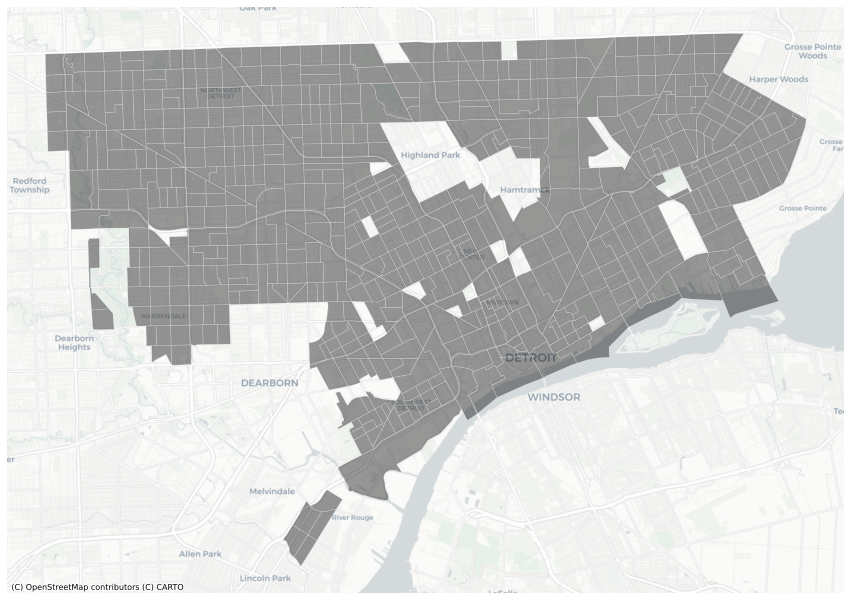

In [ ]:
# plot it
fig, ax=plt.subplots(figsize=(15,15))
gdf.plot(ax=ax,
        color='black',
        edgecolor='white',
        lw=0.5,
        alpha=0.4
)
ax.axis('off') #no axis
#add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

## GI data

In [ ]:
GI = gpd.read_file('/work/Green_Stormwater_Infrastructure_Locations_OpenData.geojson')

In [ ]:
GI.head() # show first 5 rows

,OBJECTID,PROJECT_NAME,ASSET_CATEGORY,PRACTICE_TYPE,CREDIT_RECEIVED,ACRES_MANAGED,DESCRIPTION,DESIGNER,INSTALLER,MAINTAINER,...,Num_RainBarrells,Size_RainBarrel,Downspout_RainBarrel,Purpose_RainBarrels,Installation_Date,OTHER_PRACTICETYPE,Secondary_Project_Reason,Project_Engineer,DEPTH,geometry
0,1,Artesian Street,DWSD,Permeable Pavement,Yes,5.30,Porous Asphalt along Artesian Street from 1895...,None,None,DWSD,...,None,None,None,None,None,None,None,None,None,POINT (-83.22625 42.35949)
1,2,Stahelin,DWSD,Bioretention,Yes,1.12,This is a bioretention practice installed on a...,None,None,DWSD,...,None,None,None,None,None,None,None,None,None,POINT (-83.22453 42.35200)
2,3,Greenview,DWSD,Bioretention,Yes,0.58,This is a bioretention practice installed on a...,None,None,DWSD,...,None,None,None,None,None,None,None,None,None,POINT (-83.22238 42.35096)
3,4,Evergreen,DWSD,Bioretention,Yes,0.70,This is a bioretention practice installed on a...,None,None,DWSD,...,None,None,None,None,None,None,None,None,None,POINT (-83.23628 42.35339)
4,5,Vaughan,DWSD,Bioretention,Yes,1.00,This is a bioretention practice installed on a...,None,None,DWSD,...,None,None,None,None,None,None,None,None,None,POINT (-83.23734 42.35170)


In [ ]:
GI.info() # show columns and data types

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   OBJECTID                  243 non-null    int64   
 1   PROJECT_NAME              243 non-null    object  
 2   ASSET_CATEGORY            243 non-null    object  
 3   PRACTICE_TYPE             243 non-null    object  
 4   CREDIT_RECEIVED           241 non-null    object  
 5   ACRES_MANAGED             243 non-null    float64 
 6   DESCRIPTION               236 non-null    object  
 7   DESIGNER                  59 non-null     object  
 8   INSTALLER                 58 non-null     object  
 9   MAINTAINER                70 non-null     object  
 10  MEDIA_URL                 240 non-null    object  
 11  ADDITIONAL_PRACTICETYPE   22 non-null     object  
 12  GALLONS_MANAGED_MG        243 non-null    float64 
 13  PRACTICE_AREA             64 non-null     

In [ ]:
# trim the data to the bare minimum columns
GI = GI[['OBJECTID','PRACTICE_TYPE','GALLONS_MANAGED_MG','PRACTICE_AREA','DISTRICT','geometry']]

In [ ]:
# last 5 rows
GI.tail()

,OBJECTID,PRACTICE_TYPE,GALLONS_MANAGED_MG,PRACTICE_AREA,DISTRICT,geometry
238,848,Green Roof,0.175,NaN,District 1,POINT (-83.22254 42.42186)
239,849,Disconnected Impervious,0.481,NaN,District 1,POINT (-83.22251 42.42029)
240,850,Subsurface Detention,4.374,NaN,District 1,POINT (-83.22071 42.42193)
241,863,Disconnected Impervious,0.036,NaN,District 4,POINT (-82.96796 42.40954)
242,864,Bioretention,0.128,NaN,District 2,POINT (-83.15628 42.43804)


In [ ]:
GI.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
GI=GI.to_crs(epsg=3857)

In [ ]:
minx1, miny2, maxx1, maxy2=gdf.geometry.total_bounds
print(minx1)
print(miny2)
print(maxx1)
print(maxy2)

-9271555.819250483
5199248.058715129
-9229546.515092881
5228662.135783636


In [ ]:
GI.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

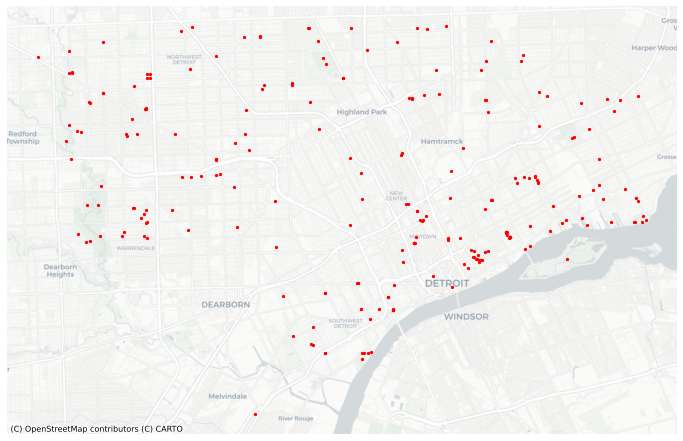

In [ ]:
#plot it
fig, ax=plt.subplots(figsize=(12,12))
GI.plot(ax=ax,
         color='red',
         markersize=5
)
ax.axis('off') #no axis
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Create a two layer map

In [ ]:
#create a two layer map
# get the bounding box for GI
minx, miny, maxx, maxy=GI.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-9271432.208974708
5202189.218159581
-9231702.359632354
5227554.582150403


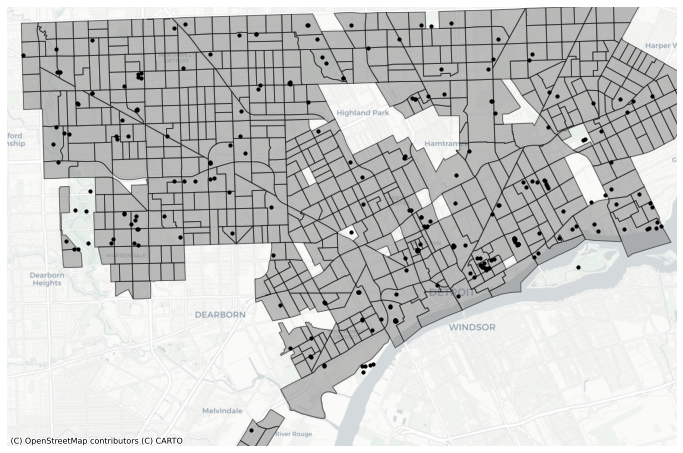

In [ ]:
#sub plot for multilayer maps
fig, ax=plt.subplots(1,1,figsize=(12,12))
gdf.plot(ax=ax,
         color='gray',
         edgecolor='black',
         alpha=0.5
)
GI.plot(ax=ax,
         color='black',
         markersize=10
)
# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx-1000,maxx+1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny-1000,maxy+1000)
ax.axis('off') #no axis
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## The spatial join

In [ ]:
# do the spatial join 
join=gpd.sjoin(GI, gdf, how='left')
join.head()

,OBJECTID,PRACTICE_TYPE,GALLONS_MANAGED_MG,PRACTICE_AREA,DISTRICT,geometry,index_right,FIPS,TotalPopu
0,1,Permeable Pavement,3.84,2442.0,District 7,POINT (-9264703.679 5214982.076),600.0,261635467002,628.0
1,2,Bioretention,1.24,8715.0,District 7,POINT (-9264512.586 5213854.127),591.0,261635460002,1788.0
2,3,Bioretention,0.21,7840.8,District 7,POINT (-9264272.897 5213697.578),591.0,261635460002,1788.0
3,4,Bioretention,0.33,13155.0,District 7,POINT (-9265820.643 5214063.453),592.0,261635461001,1759.0
4,5,Bioretention,1.28,9150.0,District 7,POINT (-9265938.579 5213809.567),592.0,261635461001,1759.0


In [ ]:
GI_by_gdf=join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='GI_count')

In [ ]:
GI_by_gdf.head()

,FIPS,GI_count
0,261635164001,12
1,261635169002,9
2,261635211002,8
3,261635180002,6
4,261635204003,6


<AxesSubplot:xlabel='FIPS'>

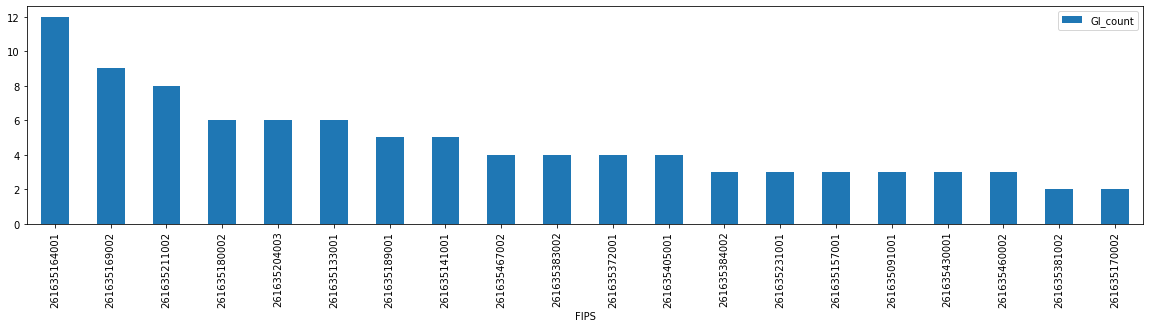

In [ ]:
# bar chart of 20 geographies
GI_by_gdf[:20].plot.bar(figsize=(20,4),
        x='FIPS',
        y='GI_count')

In [ ]:
# join GI value counts back to the gdf
gdf=gdf.merge(GI_by_gdf, on='FIPS')

In [ ]:
gdf.head()

,FIPS,TotalPopu,geometry,GI_count
0,261635012001,1366.0,"MULTIPOLYGON (((-9234741.128 5222727.977, -923...",1
1,261635013001,710.0,"MULTIPOLYGON (((-9235101.580 5221848.109, -923...",1
2,261635014001,1368.0,"MULTIPOLYGON (((-9233777.769 5222468.199, -923...",2
3,261635026004,773.0,"MULTIPOLYGON (((-9236188.838 5220695.178, -923...",1
4,261635035001,906.0,"MULTIPOLYGON (((-9240040.047 5226278.131, -923...",2


In [ ]:
# save this geodataframe
gdf.to_file('/work/gdf.geojson', driver="GeoJSON")  

In [ ]:
#read saved file
gdf=gpd.read_file('/work/gdf.geojson')

In [ ]:
gdf.head()

,FIPS,TotalPopu,GI_count,geometry
0,261635012001,1366.0,1,"MULTIPOLYGON (((-9234741.128 5222727.977, -923..."
1,261635013001,710.0,1,"MULTIPOLYGON (((-9235101.580 5221848.109, -923..."
2,261635014001,1368.0,2,"MULTIPOLYGON (((-9233777.769 5222468.199, -923..."
3,261635026004,773.0,1,"MULTIPOLYGON (((-9236188.838 5220695.178, -923..."
4,261635035001,906.0,2,"MULTIPOLYGON (((-9240040.047 5226278.131, -923..."


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   FIPS       128 non-null    object  
 1   TotalPopu  128 non-null    float64 
 2   GI_count   128 non-null    int64   
 3   geometry   128 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 4.1+ KB


## Choropleth map of GI

/root/venv/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/root/venv/lib/python3.7/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


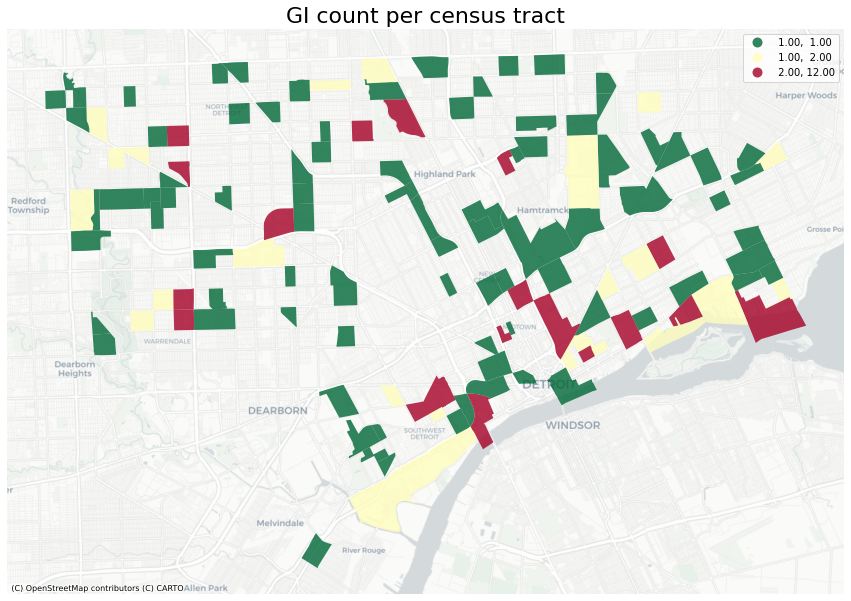

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
gdf.plot(ax=ax,
         column='GI_count',
         legend=True,
         alpha=0.8,
         edgecolor='black',
         cmap='RdYlGn_r', # a diverging color scheme
         scheme='quantiles') 
ax.axis('off')
ax.set_title('GI count per census tract', fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Acknowledgement 

This notebook is largely inspired by https://github.com/yohman/workshop-python-spatial-stats

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07339f06-90e5-4c02-8b70-8efdcc6aa3fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>